In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
import pandas as pd

run_paths = [
   #"../mlruns/117967985259146291/0320dd8c949d4fed92b098c9bc2ea4b4/metrics/", # SMALL SYN
    #"../mlruns/117967985259146291/fe82d5ea6ef14bfcaa382bac08eca665/metrics/", # MEDIUM SYN
    "../mlruns/117967985259146291/8d735c8048dc4233b52a53f90d4de39c/metrics/", # LARGE SYN
    
    #"../mlruns/117967985259146291/6111072cb4fc420099d4cbbfff0e0a28/metrics/", # SMALL SYNFLEUR 1.0h
    #"../mlruns/117967985259146291/f21f880299db4b3987ddf60a70f965cd/metrics/", # MEDIUM SYNFLEUR 1.0h
    #"../mlruns/117967985259146291/eaad4c60cd734ecd84e43b94f4250fd9/metrics/", # LARGE SYNFLEUR
    
    
    #"../mlruns/117967985259146291/1d6aa256120f478aa454490c7bc9e1d4/metrics/", # SMALL SYNCV
    #"../mlruns/117967985259146291/b5fbbe1ad2f64e8d866592754a2f181b/metrics/", # MEDIUM SYNCV    
    #"../mlruns/117967985259146291/957f69d28f5c4835b4084932b946c948/metrics/", # LARGE SYNCV 

]

df_list = []  # List to store DataFrames from each run

for run_path in run_paths:
    data = {"epoch": []}  # Dictionary to store extracted data
    
    for file_name, col_name in [("loss", "loss"), ("eval_loss", "eval_loss")]:
        file_path = os.path.join(run_path, file_name)
        print(file_path)

        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                lines = file.readlines()

                # Extract epoch and loss values
                epochs, losses = [], []
                for line in lines:
                    parts = line.strip().split()  # Split by whitespace
                    if len(parts) == 3:
                        _, loss, epoch = parts
                        
                        if file_name == "eval_loss":
                            if loss != None:
                                latest_eval_loss = loss
                                

                        epochs.append(int(epoch))
                        if loss != None:
                            losses.append(float(loss))
                        else: 
                            losses.append(float(latest_eval_loss))
                
                        
                
                data[col_name] = losses
                data["epoch"] = epochs

        else:
            print(f"File {file_name} not found in {run_path}")

    # Convert dictionary to DataFrame
    df_run = pd.DataFrame(data)

    # Add a column to indicate which run this data is from
    df_run["run"] = os.path.basename(os.path.dirname(run_path))  # Use run ID as identifier

    # Append the DataFrame to the list
    df_list.append(df_run)

# Concatenate all runs into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# ✅ Sort by epoch
df = df.sort_values(by="epoch").reset_index(drop=True)

print(df)



    

../mlruns/117967985259146291/8d735c8048dc4233b52a53f90d4de39c/metrics/loss
['1743004639638', '0.6871', '25']
['1743004659119', '0.5164', '50']
['1743004678683', '0.5625', '75']
['1743004698135', '0.4393', '100']
['1743004717583', '0.39', '125']
['1743004736983', '0.3341', '150']
['1743004756500', '0.3337', '175']
['1743004776097', '0.3337', '200']
['1743004795501', '0.3175', '225']
['1743004814954', '0.2649', '250']
['1743004834358', '0.3884', '275']
['1743004853857', '0.2373', '300']
['1743004873376', '0.2914', '325']
['1743004892864', '0.2374', '350']
['1743004912655', '0.2315', '375']
['1743004932202', '0.2172', '400']
['1743004951862', '0.2333', '425']
['1743004971366', '0.2118', '450']
['1743004990858', '0.3715', '475']
['1743005010436', '0.2034', '500']
['1743005030467', '0.2117', '525']
['1743005049886', '0.2058', '550']
['1743005069268', '0.2731', '575']
['1743005088757', '0.2352', '600']
['1743005108187', '0.2249', '625']
['1743005127757', '0.2162', '650']
['1743005147349', '0

ValueError: All arrays must be of the same length

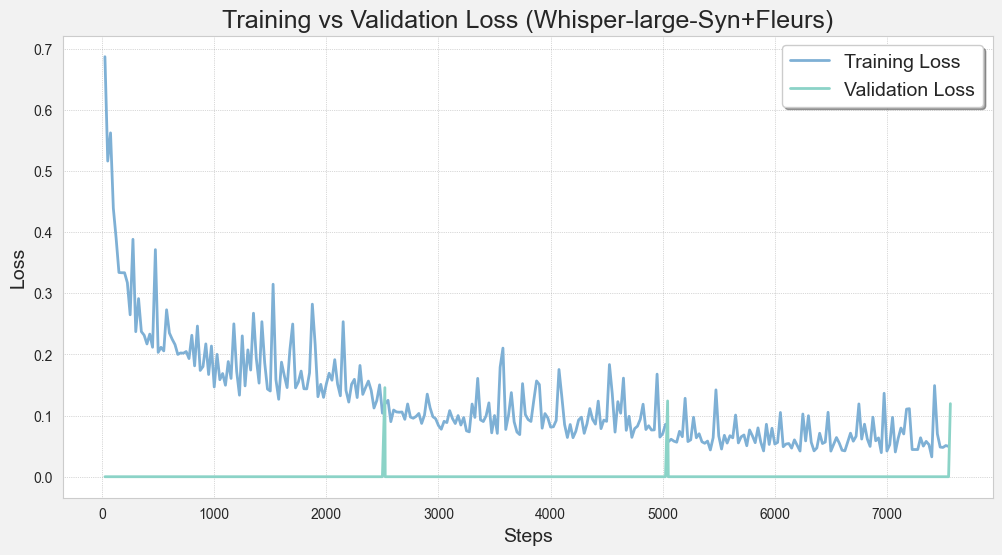

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style with a beige background
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), facecolor="#f2f2f2")  # Soft beige background

# Choose a beautiful font# Use a classic serif font
plt.rcParams["font.size"] = 10       # Slightly larger font

plt.plot(df["epoch"], df["loss"], label="Training Loss", 
         color="#7eb0d5", linewidth=2, alpha=1.0)
plt.plot(df["epoch"], df["eval_loss"], label="Validation Loss", 
         color="#8bd3c7", linewidth=2,  alpha=1.0)

plt.xlabel("Steps", fontsize=14)  # Increased label padding
plt.ylabel("Loss", fontsize=14)  # Increased label padding
plt.title("Training vs Validation Loss (Whisper-large-Syn+Fleurs)", fontsize=18)  # Increased title padding

plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)

plt.legend(fontsize=14, loc="upper right", frameon=True, shadow=True, facecolor="white")

plt.show()
